# An End-to-End Machine Learning Project

## Getting the Data
Download the data from a local .csv file and save it in a Pandas DataFrame

In [2]:
import pandas as pd
housing = pd.read_csv("housing.csv")

We can take a look at the first few lines of the file by using head()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


info() provides us with details about the number of columns in the data frame, size (number of rows), and the type of the data

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity is the only non-numeric attribute and we can look at this further by using value_counts() which tells us the categories of values present for the attribute and how frequently they appear.

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe() gives us a summary of the numeric attributed - their mean, standard deviation, quartiles etc.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting histograms of these attributes gives us a more details picture of the range and spread of values.

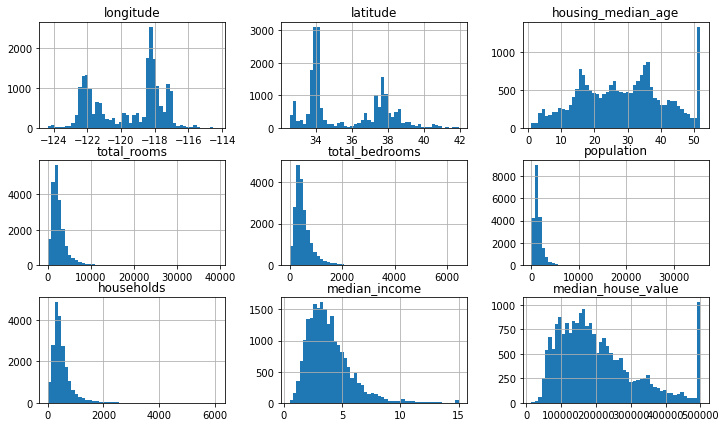

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50, figsize=(12,7))
plt.show()

## Create a Test Set
Split the data into a training set and test set using an 80-20 split. 
The random_state=42 is used to make the results repeatable: 
if we use the same random_state value in the future we will end up with the same rows in the train and test sets. 
Using a different value results in the rows being distributed differently over the two data frames. 
Having a repeatable experiment is useful for verifying results.

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


### Stratified Sampling
Sometimes we need to be careful which creating the training and test set 
because if we have skewed or imbalanced data then there is a danger that the training 
and test sets do not both contain a representative same of the data.

This is ilustrated in the case of the median_income attribute below. 
Plotting the values demonstrates a positive skew with most values falling in the range 0-6 with a long tail after that.
If we sample randomly from this, particularly for the smaller test set, there is a danger that we do not re-create the same distribution and instead bias the data by picking from the more frequently occurring values.

We can address this by using the technique of stratified sampling.

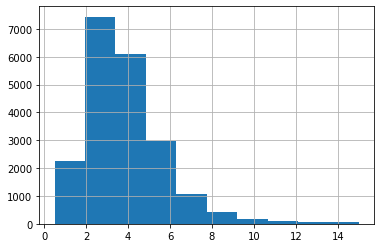

In [9]:
housing["median_income"].hist()
plt.show()

We create a new column in the data frame called income_cat and 
divide by 1.5 to limit the number of income categories.
Then all of those with a value of greater than 5 are replaced with the value 5 to group all
the high values together.

Plotting a histogram of this new category demonstrates the consequence of this.

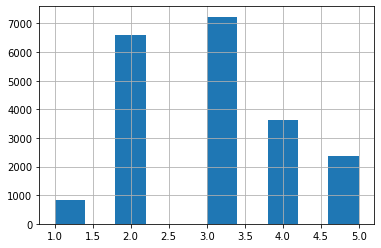

In [10]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()
plt.show()

We can then use the StratifiedShuffleSplit class from scikit-learn to split the data into 
training and test sets. 
The income_cat attribute is provided as the target variable on which the stratification will be based. 


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [12]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,3.006541
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,5.000000


In [13]:
strat_test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.00000,4128.000000,4128.000000,4128.000000
mean,-119.545187,35.600998,28.585029,2687.902132,549.484187,1448.220446,509.45688,3.850998,206315.401647,3.007267
std,2.010260,2.127489,12.630172,2345.868226,454.414696,1197.088364,407.59254,1.879270,114170.048854,1.054808
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.00000,0.499900,14999.000000,1.000000
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.00000,2.543000,118975.000000,2.000000
50%,-118.455000,34.220000,28.000000,2158.500000,441.000000,1172.000000,416.00000,3.514750,181300.000000,3.000000
75%,-117.980000,37.690000,37.000000,3171.000000,653.000000,1754.000000,613.00000,4.739700,269025.000000,4.000000
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.00000,15.000100,500001.000000,5.000000


We can then plot the distributions of the training and test sets to check that they look similar.

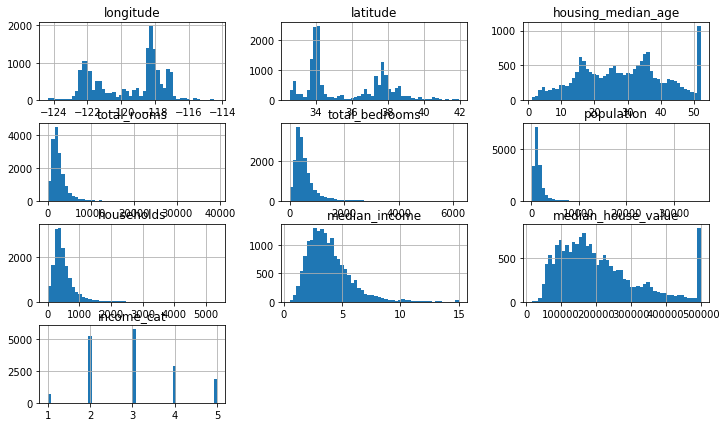

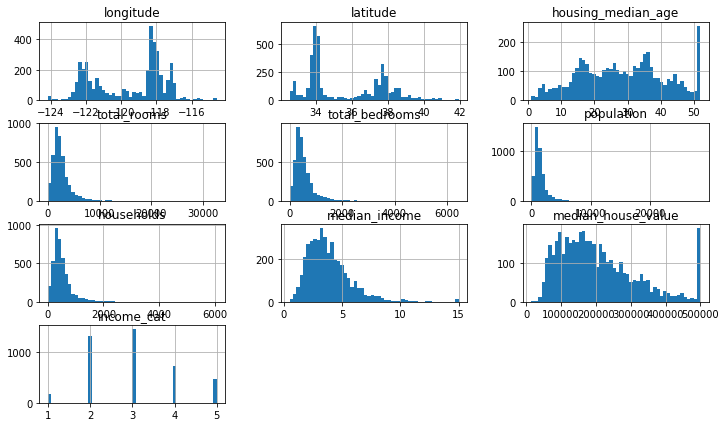

In [15]:
strat_train_set.hist(bins=50, figsize=(12,7))
strat_test_set.hist(bins=50, figsize=(12,7))
plt.show()

Having created the training and test sets using this newly introduced column we then delete it
as it is no longer needed (the original median_income data still remains).

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Finally we create a copy of the training data.

In [17]:
housing = strat_train_set.copy()

## Visualise the Data

Visualisations are important and allow us to explore the data to understand 
what it looks like and also identify any possible problems (missing values, errors etc.).
The histrograms we have already created have demonstrated this but more even insights can be 
gained from looking at the relationships between variables.

The scatterplot below plots the location of each entry in the data using the longitude and latitude
values, reflects the population attribute in the size of the point plotted, and uses colour 
to indicate the value of the property. 
This gives a very clear picture of where the most expensive properties are located.

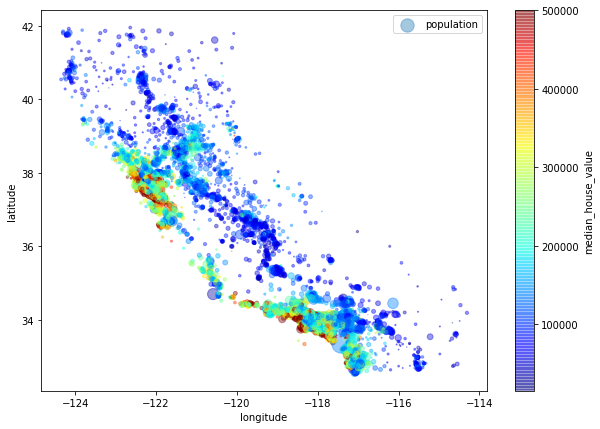

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

Correlation values indicate the strength of a linear relationship between values. 

In [19]:
corr_matrix = housing.corr()
corr_matrix
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

These can be visualised using Pandas’ scatter_matrix function which plots every numerical 
attribute against every other one.
There are potentially large number of combinations so a subset is selected containing
those of interest.

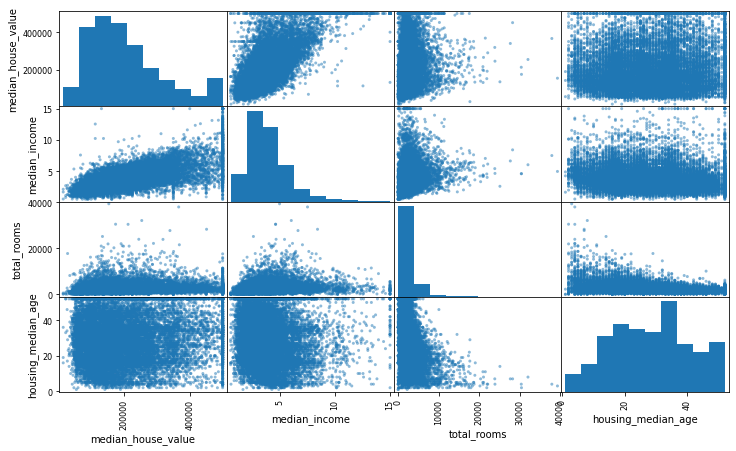

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,7))
plt.show()

We can look in detail at ones where there seems to be a potential relationship.

(0.0, 16.0, 0.0, 550000.0)

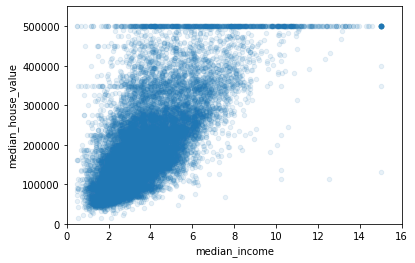

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Feature Engineering: Experimenting with Attribute Combinations

It is sometimes useful to create new attributes which are combinations of existing ones. 
We could then go on to visualise these, look for correlations etc.

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
# Look at modified data frame
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND,5.140351,0.200683,2.540351
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN,8.061372,0.141961,2.776173
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND,5.442667,0.143557,2.496000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN,4.257991,0.249330,4.374429
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,2.373272,0.444660,12.396313


## Prepare the Data

Firstly separate out the predictors and labels. 
median_house_value is the attribute we are trying to predict so we drop it from the set of 
predictors and preserve it as a separate set of target values.

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

### Dealing with missing values

We can look for any missing values using isnull().
As we can see, most of the attributes look fine apart from the total_bedrooms column.

In [25]:
housing.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

We can take a look at those rows which have missing values.

In [26]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


One option is to drop all of these

In [27]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


Another option is to replace the missing values with the median value

In [28]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


We are going to choose the option of replacing missing values with the median. 

We are also going to include some of the engineered features touched on earlier.

In [29]:
housing["total_bedrooms"].fillna(median, inplace=True)
# And then recompute any dependencies and add in other attribute combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Handling Categorical Attributes
The attribute ocean_proximity is a categorical attribute so we need to use one-hot encoding
to convert this to a form that is usable by machine learning algorithms.

In [30]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

Firstly we need to find out the range of values we need to encode. 
factorize() will create a numeric encoding of these categories 
(which we are not going to use as it could be misleadning in the relationship between values that it implies), but is also tells us the set of categories that exist.

In [31]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded

array([0, 0, 1, ..., 2, 0, 3], dtype=int64)

In [32]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

We can then use the OneHotEncode class which will transform the column into an matrix with
each category represented as a binary attribute.

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# Need to reshape into 2-d array
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [35]:
hcea = housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We then need to incorporate this into the dataframe but we'll come back to that as first we are going to scale the numeric values so we need to separate out the numeric and categorical data.

In [40]:
housing_num = housing.drop('ocean_proximity', axis=1)
cat_attribs = ['ocean_proximity']
num_attribs = list(housing_num)

### Feature Scaling
Machine Learning algorithms often don’t perform well when the numerical attributes have very different scales so we are going to bring the numeric values more into line with each other by transforming them using the StandardScaler. We can then look at the data to observe the impact of this.

In [41]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
housing_num[num_attribs] = std_scaler.fit_transform(housing_num[num_attribs])

housing_num.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,0.155318,-0.086499
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.836289,-0.033534
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,0.422200,-0.092405
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,-0.196453,0.089736
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,0.269928,-0.004194
19480,-0.696456,0.945009,-0.370047,0.143693,0.131447,0.025285,0.194138,-0.176435,-0.114867,-0.199264,-0.048003
8879,0.537433,-0.748168,1.856709,-0.182253,-0.528198,-0.583328,-0.585720,2.366702,1.003599,-1.097923,-0.027646
13685,1.166867,-0.696718,-0.210993,-0.272040,-0.586617,-0.433639,-0.324880,1.115239,0.000891,-1.073504,-0.051831
4937,0.657325,-0.771554,1.459074,-0.354345,-0.167949,0.444770,-0.157197,-1.076906,-0.452724,0.545225,0.110319
4861,0.647334,-0.757522,0.027588,-0.985660,-0.742400,1.138535,-0.745417,-1.772116,-1.174387,3.534531,0.802788


### Recombining the catagorical and numerical data
Now we can add the encoded categorical data to the scaled data frame

In [42]:
enc_data = pd.DataFrame(housing_cat_1hot.toarray())
enc_data.columns = housing_categories
enc_data.index = housing.index

housing_prepared = housing_num.join(enc_data)

In [43]:
housing_prepared.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY,ISLAND
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,0.155318,-0.086499,1.0,0.0,0.0,0.0,0.0
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.836289,-0.033534,1.0,0.0,0.0,0.0,0.0
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,0.422200,-0.092405,0.0,1.0,0.0,0.0,0.0
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,-0.196453,0.089736,0.0,0.0,1.0,0.0,0.0
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,0.269928,-0.004194,1.0,0.0,0.0,0.0,0.0
19480,-0.696456,0.945009,-0.370047,0.143693,0.131447,0.025285,0.194138,-0.176435,-0.114867,-0.199264,-0.048003,0.0,0.0,1.0,0.0,0.0
8879,0.537433,-0.748168,1.856709,-0.182253,-0.528198,-0.583328,-0.585720,2.366702,1.003599,-1.097923,-0.027646,1.0,0.0,0.0,0.0,0.0
13685,1.166867,-0.696718,-0.210993,-0.272040,-0.586617,-0.433639,-0.324880,1.115239,0.000891,-1.073504,-0.051831,0.0,0.0,1.0,0.0,0.0
4937,0.657325,-0.771554,1.459074,-0.354345,-0.167949,0.444770,-0.157197,-1.076906,-0.452724,0.545225,0.110319,1.0,0.0,0.0,0.0,0.0
4861,0.647334,-0.757522,0.027588,-0.985660,-0.742400,1.138535,-0.745417,-1.772116,-1.174387,3.534531,0.802788,1.0,0.0,0.0,0.0,0.0


In [44]:
housing_prepared.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY,ISLAND
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-4.353107e-15,2.284564e-15,-4.701235e-17,7.587062e-17,1.360615e-16,-3.700743e-17,2.078979e-17,-2.102108e-16,8.014691e-17,-4.878742e-17,-1.621765e-17,0.440649,0.128634,0.318738,0.111858,0.000121
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,0.496480,0.334804,0.466001,0.315201,0.011005
min,-2.384937e+00,-1.449760e+00,-2.199168e+00,-1.223689e+00,-1.294944e+00,-1.269921e+00,-1.317668e+00,-1.772116e+00,-1.650273e+00,-2.704542e+00,-2.075303e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.111083e+00,-7.949406e-01,-8.472092e-01,-5.516890e-01,-5.793145e-01,-5.698825e-01,-5.803963e-01,-6.870806e-01,-3.822514e-01,-5.914834e-01,-5.741738e-02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.324379e-01,-6.452675e-01,2.758786e-02,-2.353301e-01,-2.458409e-01,-2.292746e-01,-2.370459e-01,-1.756999e-01,-7.966522e-02,-1.628895e-01,-2.406537e-02,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.822131e-01,9.730728e-01,6.638039e-01,2.423650e-01,2.604547e-01,2.684162e-01,2.793106e-01,4.561338e-01,2.358755e-01,4.044268e-01,1.596812e-02,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.630550e+00,2.951564e+00,1.856709e+00,1.716114e+01,1.381603e+01,3.071047e+01,1.293803e+01,5.839969e+00,5.225419e+01,3.975916e+01,1.070603e+02,1.000000,1.000000,1.000000,1.000000,1.000000


## Select and Train a Model
Finally we are in a position to train a model!
We are going to keep things simple and use Linear Regression. Specifically we are using Multiple Linear Regression (or just Multiple Regression) as we are using several predictors (or features or independent/explanatory variables) to predict the response (or dependent) variable. 

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

We can then look at a small amount of data to see how well our model has worked (this is very different to a test of the model - it is just a small illustration). In this case we are just going to look at the first 5 rows.

In [46]:
some_data = housing_prepared.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [47]:
print("Predictions:", lin_reg.predict(some_data))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [48]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Next we are going to look at the performance of the model in terms of the error (calculated using RMSE or root mean square error)

In [49]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Finally we are going to look at the cross validation scores. This will return 10 RMSE values: one for each "fold" in the cross-validation set.

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([66782.73843989, 66960.118071  , 70347.95244419, 74739.57052552,
       68031.13388938, 71193.84183426, 64969.63056405, 68281.61137997,
       71555.05982957, 67665.10082067])

We could also go on to explore the results further, particularly by plotting them, but we'll look at that in some future examples.

In [57]:
from sklearn import svm

regr = svm.SVR(kernel="rbf", C=1, gamma="scale")
regr.fit(housing_prepared, housing_labels)

SVR(C=1)

In [58]:
housing_predictions1 = regr.predict(housing_prepared)

svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

68628.19819848923

In [59]:
scores1 = cross_val_score(regr, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores1 = np.sqrt(-scores1)
rmse_scores1

array([111389.0681902 , 119541.25938571, 116957.62830414, 120447.19932481,
       117618.15904234, 122309.10351544, 117634.40230741, 121469.713921  ,
       120343.01369623, 118017.12860651])